In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [196]:
# Read the XLSX file
data = pd.read_csv("movies_tous.csv")

In [197]:
data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description
0,Les Affranchis,12/09/1990,Drame,145.0,Martin Scorsese,Warner Bros. France,"Ray Liotta,Robert De Niro,Joe Pesci",Goodfellas,",U,.,S,.,A,.",Anglais,Long-métrage,1990,25 000 000 $,NaN,"5,0","4,5",5 articles de presse,7 prix et 16 nominations,"Depuis sa plus tendre enfance, Henry Hill, né ..."
1,Les Algues vertes,12/07/2023,Thriller,107.0,Pierre Jolivet,Haut et Court,"Céline Sallette,Nina Meurisse,Julie Ferrier",NaN,",F,r,a,n,c,e",Français,Long-métrage,2023,"3,7 M€",181 962 entrées,"3,5","4,0",23 articles de presse,NaN,"À la suite de morts suspectes, Inès Léraud, je..."
2,Insidious: The Red Door,05/07/2023,Fantastique,108.0,Patrick Wilson,Sony Pictures Releasing France,"Patrick Wilson,Rose Byrne,Ty Simpkins",NaN,",U,.,S,.,A,.",Anglais,Long-métrage,2023,-,537 774 entrées,"2,1","2,2",8 articles de presse,NaN,Afin de se débarrasser définitivement de leurs...
3,Asteroid City,21/06/2023,NaN,106.0,Wes Anderson,Universal Pictures International France,"Jason Schwartzman,Scarlett Johansson,Tom Hanks",NaN,",U,.,S,.,A,.",Anglais,Long-métrage,2023,-,318 488 entrées,"3,3","3,0",38 articles de presse,5 nominations,NaN
4,Farang,28/06/2023,NaN,99.0,Xavier Gens,StudioCanal,"Nassim Lyes,Loryn Nounay,Olivier Gourmet",NaN,",F,r,a,n,c,e",Français,Long-métrage,2023,-,166 852 entrées,"3,4","3,7",16 articles de presse,NaN,Sam est un détenu exemplaire. A quelques mois ...


In [198]:
data.shape

(7165, 19)

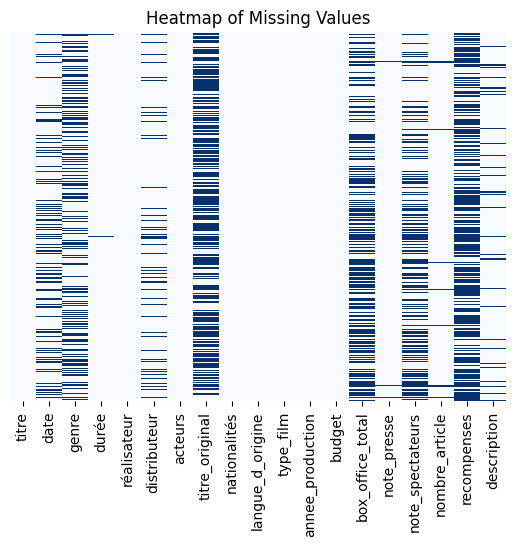

In [199]:


# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()



In [200]:
data.isnull().sum()

titre                  0
date                1655
genre               2430
durée                 37
réalisateur           10
distributeur        1158
acteurs               30
titre_original      3990
nationalités           3
langue_d_origine       0
type_film              0
annee_production       0
budget                 0
box_office_total    3428
note_presse           16
note_spectateurs    2529
nombre_article       103
recompenses         4291
description          644
dtype: int64


nationalités        215


In [201]:
data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description
0,Les Affranchis,12/09/1990,Drame,145.0,Martin Scorsese,Warner Bros. France,"Ray Liotta,Robert De Niro,Joe Pesci",Goodfellas,",U,.,S,.,A,.",Anglais,Long-métrage,1990,25 000 000 $,NaN,"5,0","4,5",5 articles de presse,7 prix et 16 nominations,"Depuis sa plus tendre enfance, Henry Hill, né ..."
1,Les Algues vertes,12/07/2023,Thriller,107.0,Pierre Jolivet,Haut et Court,"Céline Sallette,Nina Meurisse,Julie Ferrier",NaN,",F,r,a,n,c,e",Français,Long-métrage,2023,"3,7 M€",181 962 entrées,"3,5","4,0",23 articles de presse,NaN,"À la suite de morts suspectes, Inès Léraud, je..."
2,Insidious: The Red Door,05/07/2023,Fantastique,108.0,Patrick Wilson,Sony Pictures Releasing France,"Patrick Wilson,Rose Byrne,Ty Simpkins",NaN,",U,.,S,.,A,.",Anglais,Long-métrage,2023,-,537 774 entrées,"2,1","2,2",8 articles de presse,NaN,Afin de se débarrasser définitivement de leurs...
3,Asteroid City,21/06/2023,NaN,106.0,Wes Anderson,Universal Pictures International France,"Jason Schwartzman,Scarlett Johansson,Tom Hanks",NaN,",U,.,S,.,A,.",Anglais,Long-métrage,2023,-,318 488 entrées,"3,3","3,0",38 articles de presse,5 nominations,NaN
4,Farang,28/06/2023,NaN,99.0,Xavier Gens,StudioCanal,"Nassim Lyes,Loryn Nounay,Olivier Gourmet",NaN,",F,r,a,n,c,e",Français,Long-métrage,2023,-,166 852 entrées,"3,4","3,7",16 articles de presse,NaN,Sam est un détenu exemplaire. A quelques mois ...
